###  Analysis and Prediction of Delivery Time 

The project's goal is to build a machine learning model that can predict food order delivery time. 
Several factors can impact the delivery time of food orders; we will examine which ones are more responsible for improving the delivery of an order.

Food delivery services and others must tell their clients exactly how long an order will take to arrive in order to demonstrate accountability and transparency. Here's where applying predictive models becomes useful.
To predict the delivery time, distance between the restaurant and the customer address was calculated as well as few other facors were considered.

#### 1. Import packages and libraries

In [1]:

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

from sklearn.ensemble import RandomForestClassifier


# For metrics and helpful functions
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.tree import plot_tree

import warnings
warnings.filterwarnings("ignore")


#### Import the dataset

The dataset for this project is available [here](https://www.kaggle.com/datasets/gauravmalik26/food-delivery-dataset?select=train.csv)

In [2]:
data=pd.read_csv('Food_delivery.csv')

In [3]:
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

#### 2. Data cleaning and Explanatory Data Analysis

##### Duplicates

Check for duplicate entries 

In [5]:
print('Number of duplicates in the dataset: ' ,str(len(data[data.duplicated()==True]))) 

Number of duplicates in the dataset:  0


There was no duplicatwes in thes dataset.

##### Rename and change data type

We can see that our outcome variable 'Time_taken(min)' is object data taype and need to be corrected.Let's take a closer look at the column

In [15]:
data['Time_taken(min)'].unique()

array(['(min) 24', '(min) 33', '(min) 26', '(min) 21', '(min) 30',
       '(min) 40', '(min) 32', '(min) 34', '(min) 46', '(min) 23',
       '(min) 20', '(min) 41', '(min) 15', '(min) 36', '(min) 39',
       '(min) 18', '(min) 38', '(min) 47', '(min) 12', '(min) 22',
       '(min) 25', '(min) 35', '(min) 10', '(min) 19', '(min) 11',
       '(min) 28', '(min) 52', '(min) 16', '(min) 27', '(min) 49',
       '(min) 17', '(min) 14', '(min) 37', '(min) 44', '(min) 42',
       '(min) 31', '(min) 13', '(min) 29', '(min) 50', '(min) 43',
       '(min) 48', '(min) 54', '(min) 53', '(min) 45', '(min) 51'],
      dtype=object)

We need to remove min and check again and rename the column as 'delivery_time'. In order to do that, we need to create a function that splits the values

In [20]:
def split_fn(x):
    return x.split(' ')[1].strip()

In [21]:
data['delivery_time']=data['Time_taken(min)'].apply(split_fn).astype(int)
data['delivery_time'].unique()

array([24, 33, 26, 21, 30, 40, 32, 34, 46, 23, 20, 41, 15, 36, 39, 18, 38,
       47, 12, 22, 25, 35, 10, 19, 11, 28, 52, 16, 27, 49, 17, 14, 37, 44,
       42, 31, 13, 29, 50, 43, 48, 54, 53, 45, 51])

In [22]:
data.drop(columns=['Time_taken(min)'],axis=1,inplace=True)

In [23]:
data.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'delivery_time'],
      dtype='object')

Now let's examine variables that we are interested in, and create plots to visualize relationships between variables

##### Outliers

Checking for possible outliers. Outliers can affect performances in some machine learning models. Depending on the prediction model used later, we have to either keep  or remove these values. 

In [24]:
def check_outlier(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    
    lower_limit=q1-1.5*IQR
    upper_limit=q3+1.5*IQR
    outliers=df[(df<lower_limit)|(df>upper_limit)]
    return outliers

In [25]:
print('Number of outliers in the delivery time column is: ' ,len(check_outlier(data['delivery_time'])))

Number of outliers in the delivery time column is:  270


In [38]:
def find_outliers_iqr(dataframe, threshold=1.5):
    # Calculate the IQR for all columns
    q1 = dataframe.quantile(0.25)
    q3 = dataframe.quantile(0.75)
    iqr = q3 - q1
    
    # Find indices where values are outside the IQR range
    outlier_indices = ((dataframe < (q1 - threshold * iqr)) | (dataframe > (q3 + threshold * iqr)))
    
    return dataframe[outlier_indices]

In [42]:
outliers_iqr = find_outliers_iqr(data['delivery_time'])
print("Outliers using IQR:\n", outliers_iqr)

Outliers using IQR:
 43       52
188      54
266      53
641      54
722      53
         ..
44789    53
45043    54
45185    52
45294    53
45448    53
Name: delivery_time, Length: 270, dtype: int64


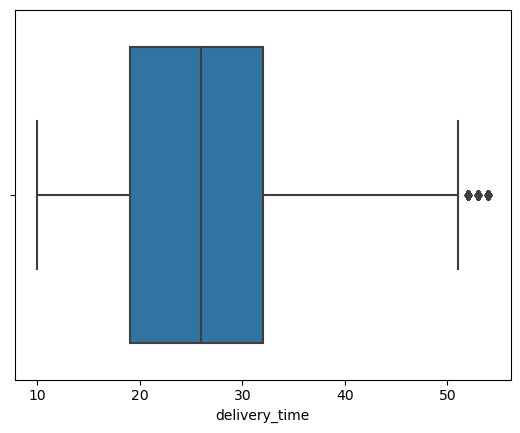

In [13]:
sns.boxplot(data=data,x='delivery_time')
plt.show()

In [44]:
data['Weatherconditions'].unique()

array(['conditions Sunny', 'conditions Stormy', 'conditions Sandstorms',
       'conditions Cloudy', 'conditions Fog', 'conditions Windy',
       'conditions NaN'], dtype=object)

In [45]:
data.groupby(['Weatherconditions'])[['delivery_time']].agg([np.median,np.mean])

delivery_time           
                             median       mean
Weatherconditions                             
conditions Cloudy              28.0  28.917330
conditions Fog                 28.0  28.916122
conditions NaN                 26.0  26.545455
conditions Sandstorms          26.0  25.875517
conditions Stormy              26.0  25.870815
conditions Sunny               20.0  21.856947
conditions Windy               26.0  26.118836

As expected average delivery time is much shorter during sunny conditions while During Fog and cloudy condition, drivers take longer time to deliver the orders.

conditions NaN needs to be investigated deeper

In [50]:
#remove the string conditions in the column
data['Weatherconditions']=data['Weatherconditions'].str.replace('conditions ','')
data['Weatherconditions'].replace('NaN',np.nan,inplace=True)

In [51]:
data['Weatherconditions'].unique()

array(['Sunny', 'Stormy', 'Sandstorms', 'Cloudy', 'Fog', 'Windy', nan],
      dtype=object)

replace 'NaN' with null values and we will deal with the missing values later

In [52]:
data['Weatherconditions'].replace('NaN',np.nan,inplace=True)

In [53]:
data['Weatherconditions'].isna().sum()

616

There could be more NaN values in other columns as well that should be replaced with missing values

In [54]:
data.replace(['NaN','NaN '],np.nan,inplace=True)

In [55]:
data.isna().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
delivery_time                     0
dtype: int64

#### Missing Values

Missing values should be handled. Many Algorithms do not support data with missing values. There are different ways of handling missing values
- delete the missing values
- impute values

There are a number of ways where we can impute missing values.
If the column is categorical, we can replace it with the most frequent category (the mode). If the column with missing values is a numerical variable, we can use either the mean or median value inplace of the missing ones.

In [56]:
numerical_columns=['Delivery_person_Age','Delivery_person_Ratings']
categorical_columns=['City','Festival','multiple_deliveries','Road_traffic_density','Weatherconditions']

In [57]:
data[categorical_columns].isna().sum()

City                    1200
Festival                 228
multiple_deliveries      993
Road_traffic_density     601
Weatherconditions        616
dtype: int64

In [58]:
data[numerical_columns].isna().sum()

Delivery_person_Age        1854
Delivery_person_Ratings    1908
dtype: int64

We use iterative and simple imputer technique to transfotm missing values in the numerical and categorical columns respectively.

In [59]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

The IterativeImputer algorithm will consider all of the columns in making value estimation where as in SimpleImputer the missing value can only be calculated from the same feature.

In [60]:
# Imputing missing values in numerical columns using IterativeImputer.
imp_numerical = IterativeImputer(max_iter=10, random_state=0)
data[numerical_columns] = imp_numerical.fit_transform(data[numerical_columns])
# check if there are any missing values after imputation
data[numerical_columns].isna().sum()

Delivery_person_Age        0
Delivery_person_Ratings    0
dtype: int64

For categorical columns, it is possible to use simple imputer technique using the most frequent catergory to replace the missing values

In [61]:
# Imputing missing values in categorical columns using SimpleImputer.
imp_categorical = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

for variable in categorical_columns:
    data[variable] = imp_categorical.fit_transform(data[variable].to_numpy().reshape(-1,1))

In [62]:
# check if there are any missing values after imputation
data[categorical_columns].isna().sum()

City                    0
Festival                0
multiple_deliveries     0
Road_traffic_density    0
Weatherconditions       0
dtype: int64

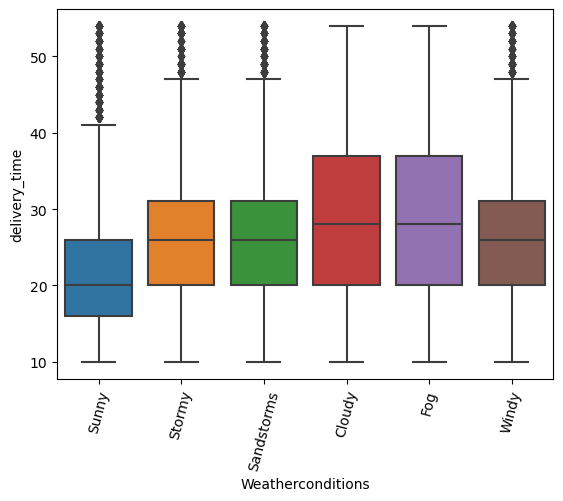

In [63]:
sns.boxplot(data=data,x='Weatherconditions',y='delivery_time')
plt.xticks(rotation=75)
plt.show();

#### 3. Feature Engineering

We can create a new distance column that represents the distance between the restaurant location and the pick up location. In the dataset we have information on the latitude and longitude location of both the restaurant as well as the delivery address location.  
In order to do that, Haversine formula was used. HAversine formula calculates distance between two points using the latitude and longitude of the two points.
Formula for calculating distance is as follows:

a = sin²(φB - φA/2) + cos φA * cos φB * sin²(λB - λA/2)

c = 2 * atan2( √a, √(1−a) )

d = R * c

In [65]:
# Set the earth's radius (in kilometers)
R = 6371

# Convert degrees to radians
def deg_to_rad(degrees):
    return degrees * (np.pi/180)

# We create a function that calculates the distance between two points using the haversine formula
def dist_calculator(lat1, lon1, lat2, lon2):
    d_lat = deg_to_rad(lat2-lat1)
    d_lon = deg_to_rad(lon2-lon1)
    a = np.sin(d_lat/2)**2 + np.cos(deg_to_rad(lat1)) * np.cos(deg_to_rad(lat2)) * np.sin(d_lon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c
  
# Calculate the distance between each pair of points
data['distance'] = np.nan

for i in range(len(data)):
    data.loc[i, 'distance'] = dist_calculator(data.loc[i, 'Restaurant_latitude'], 
                                        data.loc[i, 'Restaurant_longitude'], 
                                        data.loc[i, 'Delivery_location_latitude'], 
                                        data.loc[i, 'Delivery_location_longitude'])

In [66]:
data['distance'].describe()

count    45593.000000
mean        99.303911
std       1099.731281
min          1.465067
25%          4.663493
50%          9.264281
75%         13.763977
max      19692.674606
Name: distance, dtype: float64

Because the mean is considerably higher than the median, there are outliers and the data is skewed to the right.  That can easily be shown using a distribution plot.

<Axes: xlabel='distance', ylabel='Density'>

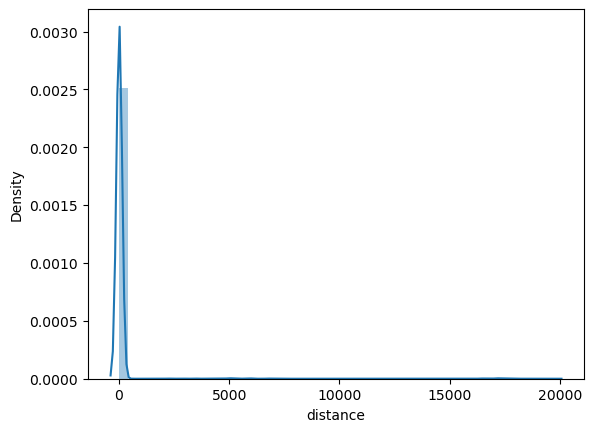

In [67]:
sns.distplot(data['distance'])

Let's check the number of outliers in our numerical columns and the newly created distance variable using our 'check_outlier' function

In [68]:
outlier_distance = check_outlier(data['distance'])
outlier_ratings = check_outlier(data['Delivery_person_Ratings'])
outlier_age = check_outlier(data['Delivery_person_Age'])
outlier_time = check_outlier(data['delivery_time'])

print('The number of outliers in the distance column : ' +str(len(outlier_distance)))
print('The number of outliers in the Driver Ratings column : ' +str(len(outlier_ratings)))
print('The number of outliers in the Driver Age column : ' +str(len(outlier_age)))
print('The number of outliers in the delivery time column : ' +str(len(outlier_time)))

The number of outliers in the distance column : 431
The number of outliers in the Driver Ratings column : 5345
The number of outliers in the Driver Age column : 53
The number of outliers in the delivery time column : 270


##### 3.1 Feature Selection

Remove some irrelavant variables from the dataset so that we get a much improved model performance.

In [69]:
data.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'delivery_time', 'distance'],
      dtype='object')

In [70]:
data_final=data.copy()
data_final=data_final.drop(columns=['ID', 'Delivery_person_ID','Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked'],axis=1)

In [71]:
data_final.head()

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,delivery_time,distance
0,37.0,4.9,Sunny,High,2,Snack,motorcycle,0,No,Urban,24,3.025149
1,34.0,4.5,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33,20.183530
2,23.0,4.4,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26,1.552758
3,38.0,4.7,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21,7.790401
4,32.0,4.6,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30,6.210138


#### 4. Explanatory Data Analysis (continued)

In [72]:
data_final.groupby(['Type_of_vehicle'])[['delivery_time']].agg([np.median,np.mean])

delivery_time           
                         median       mean
Type_of_vehicle                           
bicycle                    26.0  26.426471
electric_scooter           24.0  24.470110
motorcycle                 26.0  27.605674
scooter                    24.0  24.480754

After performing a hypothesis testing using one way anova, There was significant difference on average delivery time among the different delivery types and that difference was not due to chance.

In [88]:
# import the necessary library
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Define the formula for the model
formula = 'delivery_time ~ Type_of_vehicle'

# Fit the model
model = ols(formula, data=data_final).fit()

# Perform ANOVA and get the table
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
Type_of_vehicle,1.083952e+05,3.0,421.686239,3.060047e-270
Residual,3.906246e+06,45589.0,NaN,NaN


In [89]:
# Tukey HSD test for post hoc analysis after ANOVA
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_oneway = pairwise_tukeyhsd(endog = data_final["delivery_time"], groups = data_final["Type_of_vehicle"])

# Display the results
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
bicycle,electric_scooter,-1.9564,0.3093,-4.8659,0.9531,False
bicycle,motorcycle,1.1792,0.7204,-1.7084,4.0668,False
bicycle,scooter,-1.9457,0.3083,-4.836,0.9446,False
electric_scooter,motorcycle,3.1356,0.0,2.7236,3.5475,True
electric_scooter,scooter,0.0106,0.9999,-0.4198,0.4411,False
motorcycle,scooter,-3.1249,0.0,-3.3666,-2.8832,True


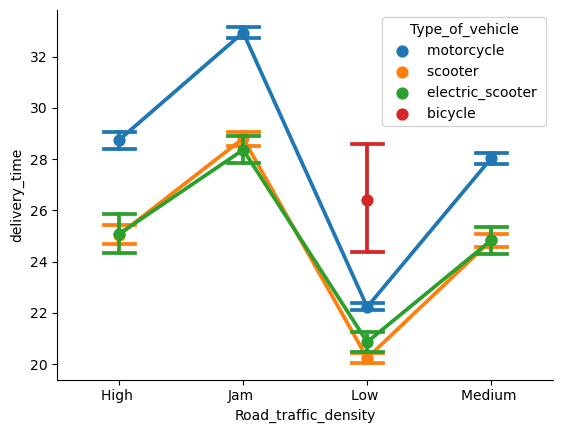

In [90]:
# Create a point plot using Seaborn
fig = sns.pointplot(
    x='Road_traffic_density',       # X-axis represents road traffic density
    y='delivery_time',              # Y-axis represents delivery time
    hue='Type_of_vehicle',          # Differentiate points by the type of vehicle
    data=data_final,                     
    capsize=0.25                     # Set capsize for error bars
)

# Remove the spines (the borders of the plot)
sns.despine()

Delivery time on scooters and electic scooter in particular were shorter compared to motor cycle and bicycle. 
The difference is particularly significant between scooters and motorcycle as well as electric scooters and motorcycle.
Hiring more  ndrivers with  scooters and electric scooters during high and jam road trafic density time could be a very good measure as the use of motorcycle during these trafic density time resulted in longer delivery period.

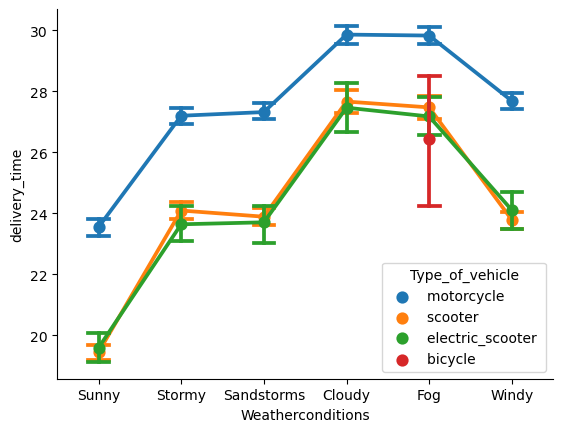

In [91]:
fig = sns.pointplot(x='Weatherconditions', y = 'delivery_time', hue='Type_of_vehicle',data = data_final,capsize=0.25)
sns.despine()

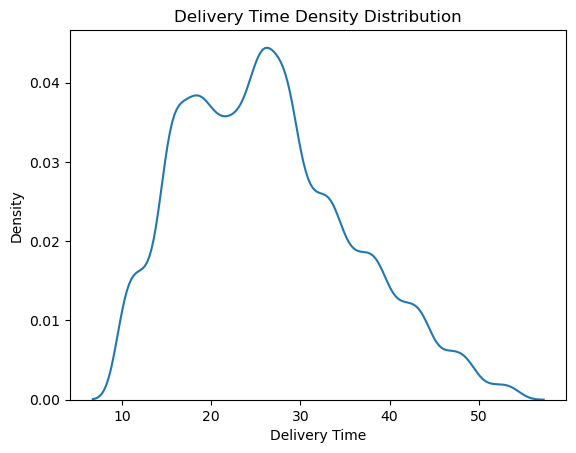

In [92]:
sns.kdeplot(data=data_final,x='delivery_time')
plt.title('Delivery Time Density Distribution')
plt.xlabel('Delivery Time')  # Add X-axis label
plt.ylabel('Density')        # Add Y-axis label
plt.show;

The density distribution plot shows that there were higher number of deliveries between 25 to 30 minutes after an order is made.

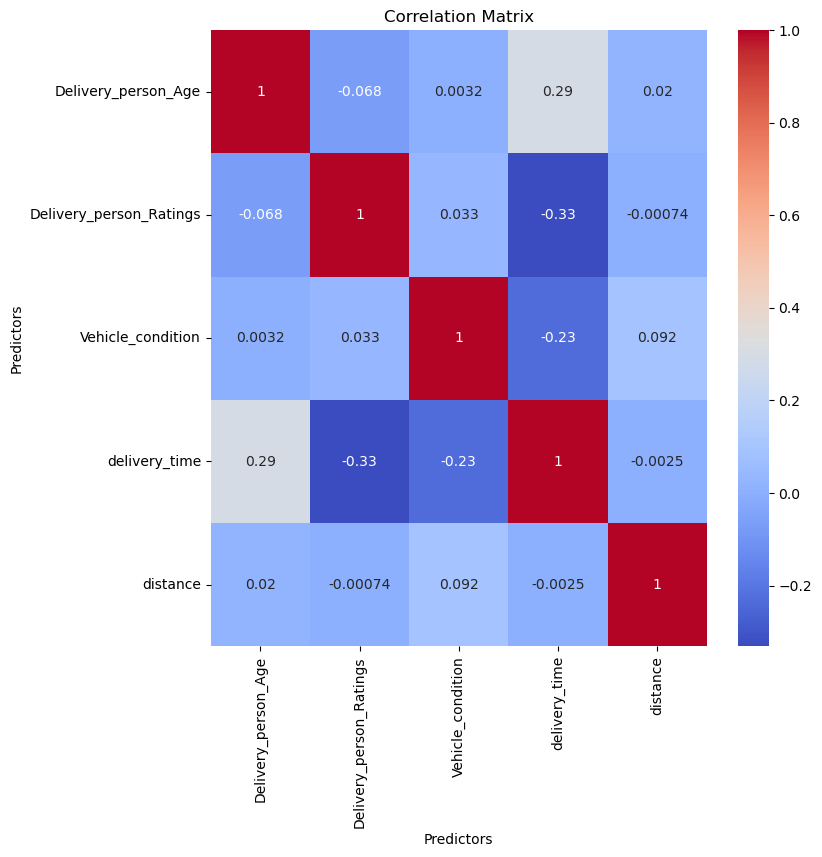

In [94]:
# Create a correlation matrix to analyze predictor correlations
corrMatrix = data_final.corr(numeric_only=True)
plt.subplots(figsize=(8,8))
sns.heatmap(corrMatrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.xlabel('Predictors')
plt.ylabel('Predictors')
plt.show()

Let's see the Relationship between some features.

In [84]:
import plotly.io as pio
pio.renderers.default = "png"

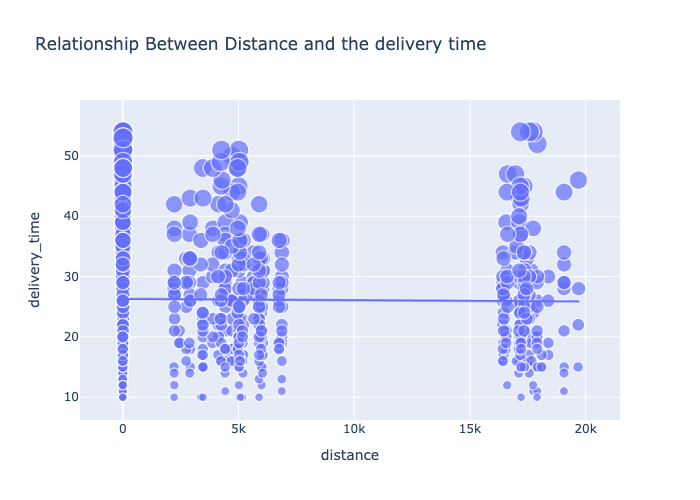

In [85]:
figure = px.scatter(data_frame = data_final, 
                    x='distance',
                    y='delivery_time', 
                    size='delivery_time', 
                    trendline="ols", 
                    title = "Relationship Between Distance and the delivery time")
figure.show('png');

Regardless of the distance between the restaurant and the pick up location, the drivers deliver the order between 20-30 minutes

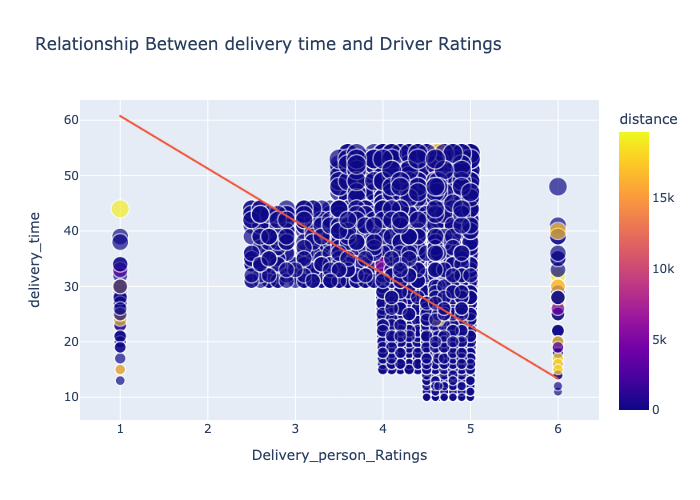

In [86]:
figure = px.scatter(data_frame = data_final, 
                    x='Delivery_person_Ratings',
                    y='delivery_time', 
                    size='delivery_time', 
                    color = "distance",
                    trendline="ols", 
                    title = "Relationship Between delivery time and Driver Ratings")
figure.show();

THere is an inverse relationship between the drivers ratings and the delivery time. The highest rated drivers deliver much quicker than those drivers with a low rating scores.

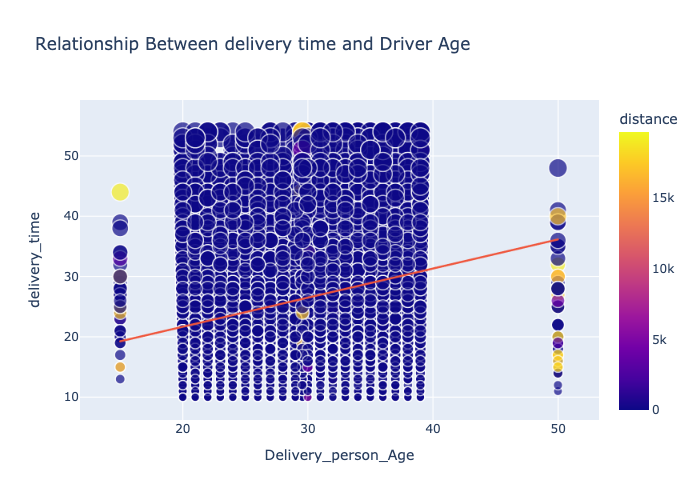

In [87]:
figure = px.scatter(data_frame = data_final, 
                    x='Delivery_person_Age',
                    y='delivery_time', 
                    size='delivery_time', 
                    color = "distance",
                    trendline="ols", 
                    title = "Relationship Between delivery time and Driver Age")
figure.show();

There is a linear relationship between age of the driver and the delivery time it take. That means Younger drivers on average take fewer minutes to deliver than older drivers.

#### 5. Data Pre-Processing and Feature Transformation

Now it is time for data pre-processing before building a machine learning model. Most machine learning algorithms can not work with categorical data. We need to transform the categorical columns in the dataset to numeric data.

In [95]:
data_final.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Weatherconditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'delivery_time', 'distance'],
      dtype='object')

In [100]:
numeric_columns=['Delivery_person_Age','Delivery_person_Ratings','distance']
categorical_columns=['Weatherconditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City']
outcome_variable=['delivery_time']

In [101]:
# Importing the LabelEncoder class from scikit-learn library
from sklearn.preprocessing import LabelEncoder

# Creating an instance of the LabelEncoder
label_encoding = LabelEncoder()

# Looping through each categorical column and applying label encoding to convert them to numeric values
for category in cat_columns:
    data_final[category] = label_encoding.fit_transform(data_final[category])

# Creating feature matrix X by combining numeric and encoded categorical columns
X = data_final[numeric_columns + categorical_columns]
y = data_final[outcome_variable]

In [102]:
data_final.head()

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,delivery_time,distance
0,37.0,4.9,4,0,2,3,2,0,0,2,24,3.025149
1,34.0,4.5,3,1,2,3,3,1,0,0,33,20.183530
2,23.0,4.4,2,2,0,1,2,1,0,2,26,1.552758
3,38.0,4.7,4,3,0,0,2,1,0,0,21,7.790401
4,32.0,4.6,0,0,1,3,3,1,0,0,30,6.210138


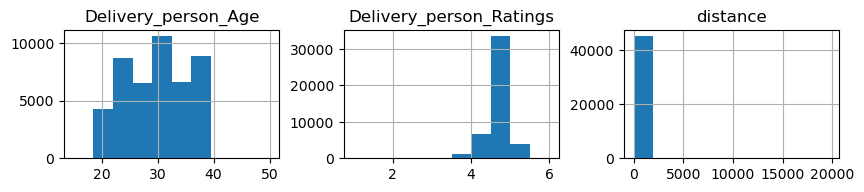

In [103]:
data_final[num_columns].hist(layout=(3,3), figsize=(10,6))
plt.show()

We have to use normalization such as MinMaxScalar or StandardScaler technique to normalize the distributions of these features. Normalization using Scikitlearn StandardScaler will be performed in the next section when building the model.

#### 6. Model Building

Split the dataset in to trainning and testing dataset using train_test_split function

Two of the most popular algorithms for predicting numerical values are linear regression and random forest regression. Linear regression models outcome variables as a linear combination of predictor variables. In comparison, Random Forest Regression builds multiple random forest decision trees, which generate aggregated or averaged predictions.

Linear Regression have four assumptions about the relationship between the independent and dependent variables. These assumptions include independent observations,linear relationship between the predictors and the mean of the outcome variable,constant variance (homoscedasticity), normality of errors, etc.
On the other hand, Random Forest Regression does not make any assumption about the underlying data distribution and can handle nonlinear relationships better. Moreover, it is less prone to overfitting due to its ability to randomly select different subsets of the data to train on and average out its results.

Random Forest Regression is preferred over linear regression when predicting numerical values because it offers greater accuracy and prediction stability.
Since we have outliers in the data , a tree based model that can handle outliers would be perfect choice. Of the tree-based models, random forest will be used here.

Let's train a machine learning model using Random forest and XGB regression model

In [104]:
# Splitting the data into training and testing sets using the train_test_split function
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,test_size=0.2, random_state=42)

# Standardizing the training data using StandardScaler from sklearn
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()

# Scaling and transforming the features in the training set
Xtrain = pd.DataFrame(
    data = scaler.fit_transform(Xtrain),
    columns = Xtrain.columns
    )
# Scaling and transforming the features in the testing set
Xtest = pd.DataFrame(
    data = scaler.fit_transform(Xtest),
    columns = Xtest.columns
    )

The above splits the data in to trainning and testing set with 80% and 20% respectively. Then then it apply standard scaling to the dataset

#### Models for Comparison

In [107]:
#Initialize two models XGBoost and Random Forest for comparison, each with 100 estimators and a random state of 1 for reproducibility. 
xgb = XGBRegressor(n_estimators=100,random_state=1)
rf = RandomForestRegressor(n_estimators=100,random_state=1)

# The 'algorithms' dictionary stores two machine learning models for comparison, where the keys are the model names ('XGBoost' and 'Random Forest') and the values are the corresponding model instances.

algorithms = { 
            'XGBoost': xgb,
            'Random Forest': rf,
            }

Test the two models on unknown dataset and evaluate the model performance

In [108]:
# Initialize empty dictionaries to store RMSE and R-squared scores for each algorithm
rmse_scores, r2_scores = {}, {}

# Loop through the 'algorithms' dictionary
for algorithm, model in algorithms.items():
    # Train the current model (model) using the training data (Xtrain and ytrain).
    model.fit(Xtrain, ytrain)
    # Make predictions on the test data
    y_pred = model.predict(Xtest)
    
    # Calculate and store the RMSE and R-squared scores for the current algorithm
    rmse_scores[algorithm] = np.sqrt(mean_squared_error(ytest, y_pred))
    r2_scores[algorithm] = r2_score(ytest, y_pred)

create a side-by-side bar plot to visually compare the performance of two machine learning models ('XGBoost' and 'Random Forest') based on their RMSE and R-squared scores on a test dataset. The plot highlights the best result for each metric with a darker color and includes dashed lines for reference.

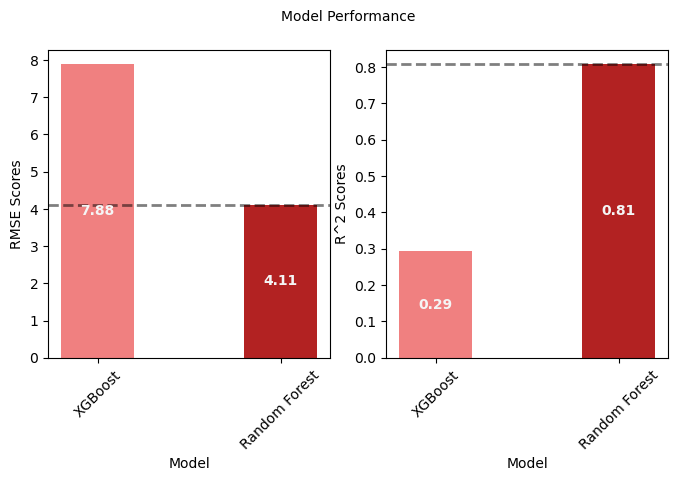

In [110]:
# Plotting the results on the test set using matplotlib
fig, ax = plt.subplots(1,2,figsize=(8,4))

# Setting up the positions and width for the bars on the plot
ind = np.arange(len(r2_scores)) + 0.3
width = 0.4

# Looping through two dictionaries containing RMSE and R-squared scores
for i, score_dict in enumerate([rmse_scores, r2_scores]): 
    scores = list(score_dict.values())

    # Creating bar plots with the specified width and color
    bars = ax[i].bar(ind, scores, width, color="lightcoral")

    # Adding labels to the bars with a white font color for better visibility
    ax[i].bar_label(bars, fmt='%.2f', weight='bold', label_type='center', color='whitesmoke')

    # Highlighting the bar with the best result by changing its face color to 'firebrick'
    ax[i].patches[scores.index(min(scores)) if i==0 else scores.index(max(scores))].set_facecolor('firebrick')

    # Adding a dashed line at the position of the best result for reference
    ax[i].axhline(min(scores) if i==0 else max(scores), ls="--", alpha=0.5, color="black", lw=2) 

    # Setting the x-axis ticks, labels, and axis labels
    ax[i].set_xticks(ind, labels=score_dict.keys(), fontsize=10, rotation=45)
    ax[i].set_xlabel("Model", fontsize=10)
    ax[i].set_ylabel("RMSE Scores" if i==0 else "R^2 Scores", fontsize=10)

# Adding a title to the entire plot
fig.suptitle("Model Performance", fontsize=10)

# Displaying the plot
plt.show()

From the plot above, we can see the random forest regression model, with a lower root mean squared error and higher  coefficient of determination score, performed much better on the dataset than The XGBoost model.

Since random forest models are highly robust to outliers as the results are calculated based on the outputs of multiple decision trees, the selection of random forest model is reasonable.

 In order to have a clear visualization of the order of importance of each feature in the model,  a horizontal bar chart was creates to visualize the feature importances of a machine learning model. The feature importances are calculated using the 'model.feature_importances_ attribute', and the results are stored in a Pandas Series named 'feature_rank'. The bar chart is then generated using Matplotlib, with features on the y-axis and their corresponding importance values on the x-axis.

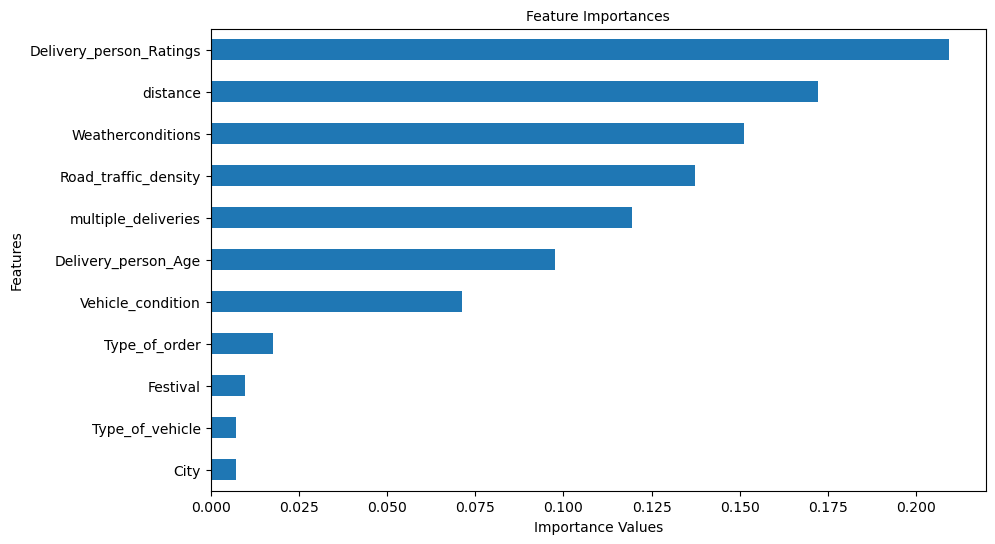

In [113]:
# Create a Pandas Series to store feature importances from the model
feature_rank=pd.Series(model.feature_importances_,index=Xtrain.columns,name='Importance').sort_values(ascending=True,inplace=False) 

# Plotting a horizontal bar chart to visualize feature importances
ax=feature_rank.plot(kind='barh',figsize=(10,6))

# Setting x-axis and y-axis labels, and the title for the plot
plt.xlabel("Importance Values", fontsize=10)
plt.ylabel("Features", fontsize=10)
plt.title("Feature Importances", fontsize=10)
plt.show();

In order to easily identify the threemost important features for predicting the target variable, a dataFrame named 'forest_3' was created to store feature names and their importances calculated by fitting a Random Forest model to the test data (Xtest and ytest). The DataFrame is then sorted based on the importances in descending order. 

In [114]:
forest_3 = pd.DataFrame({
    'Feature_names': X.columns,
    'Importances': rf.fit(Xtest, ytest).feature_importances_
}).sort_values(by='Importances', ascending=False)

What were the 3 most important features to predict delivery time?

In [115]:
forest_3[:3]

,Feature_names,Importances
1,Delivery_person_Ratings,0.203006
2,distance,0.163028
3,Weatherconditions,0.157202


It is time to test the performance of our model by giving inputs to predict the delivery time based on the three most important features so as to see how it can work.

In [116]:
x=data_final[['Delivery_person_Ratings','distance','Weatherconditions']]
y=data_final['delivery_time']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [117]:
rf_best3=RandomForestRegressor(n_estimators=100,random_state=10)
rf_best3.fit(x_train,y_train)

RandomForestRegressor(random_state=10)

In [118]:
y_pred_best3=rf_best3.predict(x_test)

In [121]:
if not (0 <= a <= 5):
    print("Please enter a valid rating between 0 and 5.")

Please enter a valid rating between 0 and 5.


In [124]:
print("Delivery Time Prediction")
a = int(input("Average rating of the driver (0-5): "))
b = int(input("Weather condition (e.g., 1 for sunny, 2 for rainy): "))
c = int(input("Total Distance betwen the restaurant and destination address: "))

features = np.array([[a, b,c]])
print("Predicted Delivery Time in Minutes = ", rf_best3.predict(features))

Delivery Time Prediction
Average rating of the driver (0-5): 1
Weather condition (e.g., 1 for sunny, 2 for rainy): 2
Total Distance betwen the restaurant and destination address: 23
Predicted Delivery Time in Minutes =  [35.19]


#### 7. Conclusion and Recommendation

- To predict order delivery time, the distance between the restaurant  and the customer address was calculated. After calcualting the distance between the restaurant and the customer address, we look for relationships between the time taken to deliver the food in the past for the same distance.
- The three most important features in predicting a delivery time for an order are: 
-- **The driver average ratings, 
-- The weather conditions as well as 
-- the distance between the restaurant and the pick up location. These variables are most helpful in predicting the outcome variable, 'delivery time'.**
- AS expected, The highest rated drivers deliver much quicker than those drivers with a low rating scores
- Younger drivers on average took fewer minutes to deliver than older drivers.
- As expected average delivery time is much shorter during sunny conditions while During Fog and cloudy condition, drivers take longer time to deliver the orders.
- As expected,the delivery time was longer on those orders that were far awar from the city than The urban or metroplitan areas of a city.
- Hiring more  number of drivers with  scooters and electric scooters could be a very good measure as the use of motorcycle during high and jam trafic density time resulted in longer delivery period. 
- The significant difference between the two scooter types and motorcycle in delivery time were also observed in all weather conditions 